**Task 3: Data Visualization** - This task focuses on converting data into meaningful visuals using Matplotlib and Seaborn to uncover trends and patterns.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("California Wildfire Damage.csv")

 **Top Causes of Wildfires** - This bar chart shows the most common causes of wildfires. It helps highlight whether human activity or natural events are more responsible.

/var/folders/yh/h73ktcwd7q3gp3d7x3kfz4nr0000gn/T/ipykernel_40478/2907316154.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='flare')


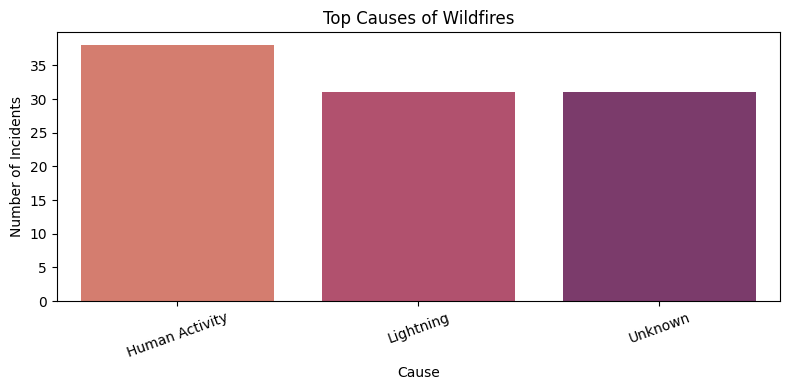

In [4]:
cause_counts = df['Cause'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=cause_counts.index, y=cause_counts.values, palette='flare')
plt.title("Top Causes of Wildfires")
plt.ylabel("Number of Incidents")
plt.xlabel("Cause")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

**Year-wise Area Burned** - This line plot shows which years had the most area burned. We can spot high-damage years and trends over time.

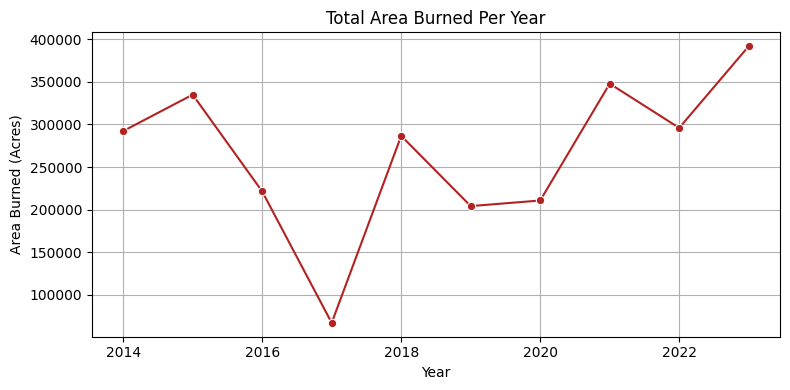

In [6]:

df["Date"] = pd.to_datetime(df["Date"], errors='coerce')


df["Year"] = df["Date"].dt.year


yearly_area = df.groupby("Year")["Area_Burned (Acres)"].sum()



plt.figure(figsize=(8, 4))
sns.lineplot(x=yearly_area.index, y=yearly_area.values, marker="o", color="firebrick")
plt.title("Total Area Burned Per Year")
plt.xlabel("Year")
plt.ylabel("Area Burned (Acres)")
plt.grid(True)
plt.tight_layout()
plt.show()



**Financial Loss by Location** - This bar plot shows which locations suffered the highest total financial losses from wildfires.

/var/folders/yh/h73ktcwd7q3gp3d7x3kfz4nr0000gn/T/ipykernel_40478/2586054768.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="crest")


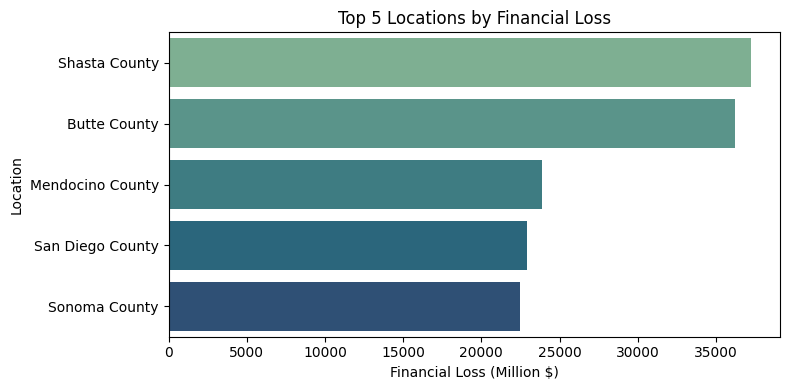

In [7]:
top_locations = df.groupby("Location")["Estimated_Financial_Loss (Million $)"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="crest")
plt.title("Top 5 Locations by Financial Loss")
plt.xlabel("Financial Loss (Million $)")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


**Area Burned vs Financial Loss** - This scatter plot checks if bigger fires always mean more financial damage. It also shows which causes tend to be more costly.

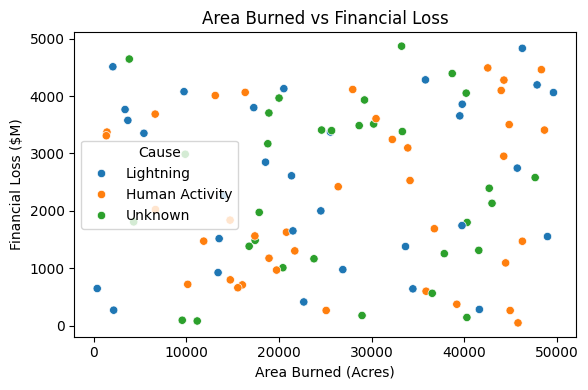

In [8]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Area_Burned (Acres)", y="Estimated_Financial_Loss (Million $)", hue="Cause")
plt.title("Area Burned vs Financial Loss")
plt.xlabel("Area Burned (Acres)")
plt.ylabel("Financial Loss ($M)")
plt.tight_layout()
plt.show()


**Box Plot of Area Burned by Cause** - This box plot compares how much area different causes usually burn. Some causes may result in more intense fires.

/var/folders/yh/h73ktcwd7q3gp3d7x3kfz4nr0000gn/T/ipykernel_40478/2154329164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cause", y="Area_Burned (Acres)", data=df, palette="pastel")


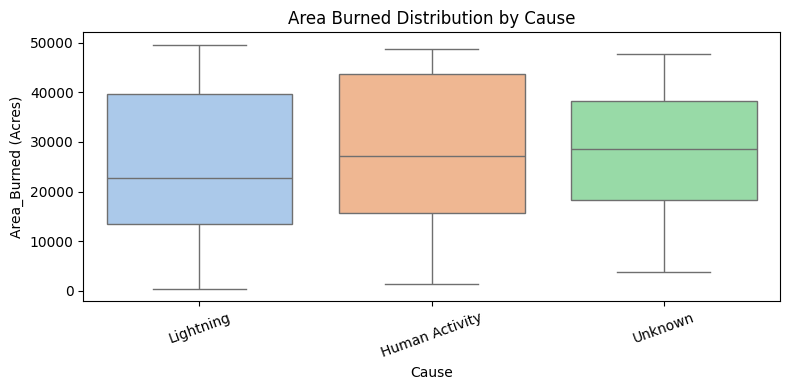

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Cause", y="Area_Burned (Acres)", data=df, palette="pastel")
plt.title("Area Burned Distribution by Cause")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


**Monthly Wildfire Frequency** - Shows if wildfires are more common in certain months — spotting seasonal patterns.



/var/folders/yh/h73ktcwd7q3gp3d7x3kfz4nr0000gn/T/ipykernel_40478/3626443689.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="summer")


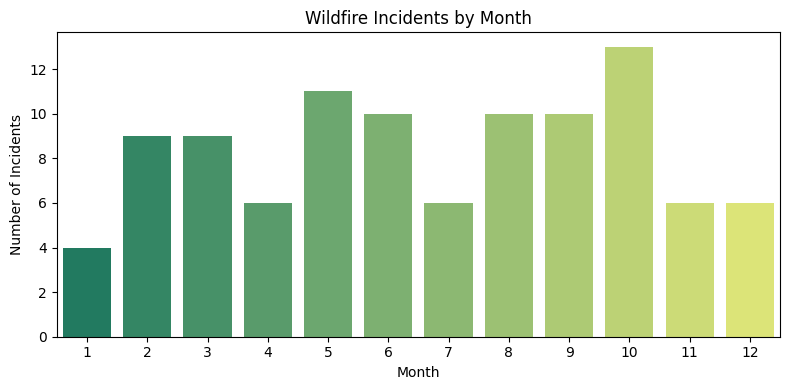

In [10]:
df['Month'] = df['Date'].dt.month
monthly_counts = df["Month"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="summer")
plt.title("Wildfire Incidents by Month")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.tight_layout()
plt.show()


**Correlation Between Numerical Features** - This heatmap shows how numerical columns (like area burned, injuries, and financial loss) are correlated with one another. Darker shades = stronger relationship.

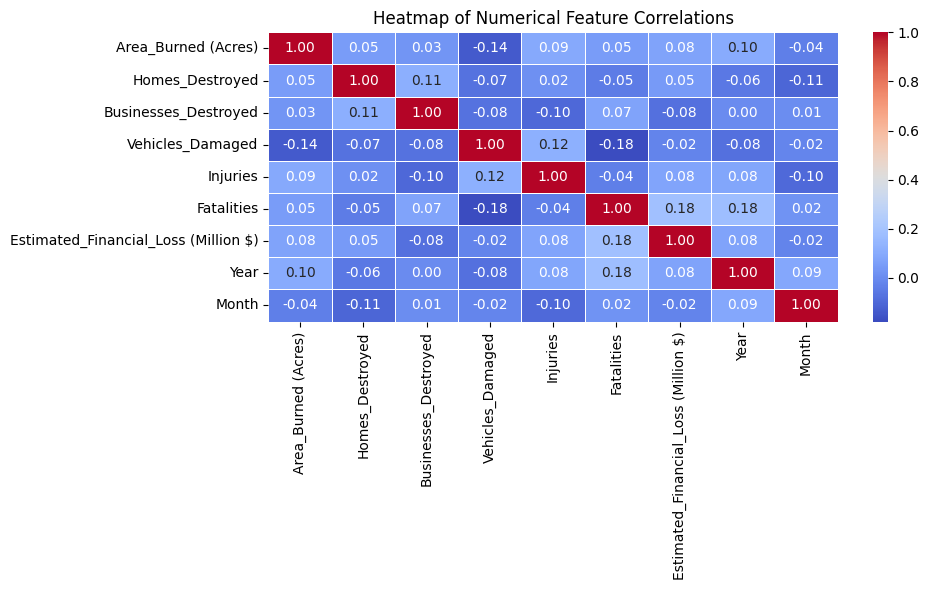

In [12]:
correlation_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(10, 6))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')


plt.title("Heatmap of Numerical Feature Correlations")
plt.tight_layout()
plt.show()

**Pie Chart: Sentiment Distribution (from Task 4)** - Pie chart shows share of fires by negative, neutral, or unknown causes.

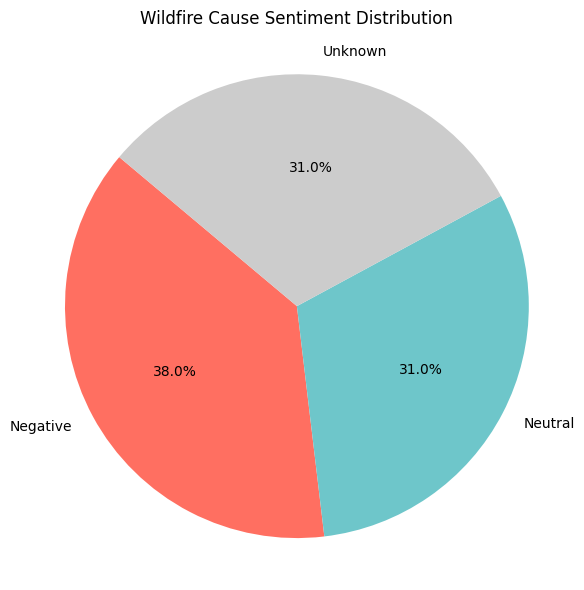

In [13]:
sentiment_map = {
    "Human Activity": "Negative",
    "Lightning": "Neutral",
    "Unknown": "Unknown"
}
df["Sentiment"] = df["Cause"].map(sentiment_map)

sentiment_pie = df["Sentiment"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_pie, labels=sentiment_pie.index, autopct="%1.1f%%", startangle=140, colors=["#ff6f61", "#6ec6ca", "#cccccc"])
plt.title("Wildfire Cause Sentiment Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()
